In [21]:
from numpy import sqrt, cos, tan

g = 9.81

def get_speed_func(startpt, endpt):
    x0, y0 = startpt
    x1, y1 = endpt
    return lambda a: sqrt(0.5*g / (y0-y1 + (x1-x0)*tan(a))) * (x1-x0)/cos(a) # not squared

def get_speed_func_squared(startpt, endpt):
    x0, y0 = startpt
    x1, y1 = endpt
    return lambda a: (0.5*g / (y0-y1 + (x1-x0)*tan(a))) * ((x1-x0)/cos(a))**2 #squared in case domain error

In [79]:
from scipy.optimize import fsolve
from scipy.integrate import quad
from numpy import radians, degrees, pi, arctan
import matplotlib.pyplot as plt
import numpy as np

rim_width = 1.2192 #4ft
rim_height = 2.64

def get_ang_speed_space(xpos, ypos, doShow=False):

    f_far_squared = get_speed_func_squared((xpos, ypos), (rim_width/2, rim_height))
    f_near_squared = get_speed_func_squared((xpos, ypos), (-rim_width/2, rim_height))
    f_squared_diff = lambda a: f_far_squared(a) - f_near_squared(a)
    intersection = fsolve(f_squared_diff, radians(85))[0]

    ang_lower_bound = max(intersection, radians(5))
    ang_upper_bound = radians(85)

    f_far = lambda a: sqrt(f_far_squared(a))
    f_near = lambda a: sqrt(f_near_squared(a))
    f_diff = lambda a: f_far(a) - f_near(a)
    area, error = quad(f_diff, ang_lower_bound, ang_upper_bound)

    if doShow:
        angles = np.linspace(degrees(ang_lower_bound), degrees(ang_upper_bound), num=50)
        lower_bound_pts = np.vectorize(f_near)(radians(angles))
        upper_bound_pts = np.vectorize(f_far)(radians(angles))

        print(f'intersection at angle = {degrees(intersection)} degrees')
        print(f'integrating from {ang_lower_bound} to {ang_upper_bound} radians')
        print(f'{area} area')
        plt.fill_between(angles, lower_bound_pts, upper_bound_pts)
        plt.xlabel("angle (degrees)")
        plt.ylabel("speed (m/s)")
        plt.xlim([5, 85])
        plt.ylim([0, 15])
        plt.show()

    return area


intersection at angle = 84.29989717605605 degrees
integrating from 1.471310764814848 to 1.4835298641951802 radians
0.014141641561620252 area


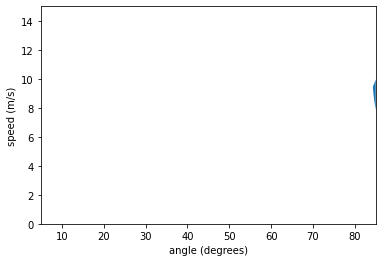

intersection at angle = 66.50001806775919 degrees
integrating from 1.1606442679181153 to 1.4835298641951802 radians
0.5493377324623918 area


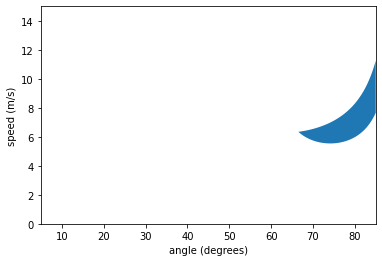

intersection at angle = 51.318027134986934 degrees
integrating from 0.8956685391333146 to 1.4835298641951802 radians
0.5514894474656356 area


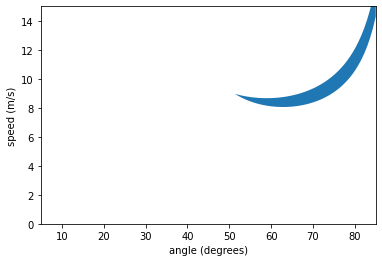

0.5514894474656356


In [98]:
area = get_ang_speed_space(-0.9, 0.2, doShow=True)
area = get_ang_speed_space(-1.5, 1.2, doShow=True)
area = get_ang_speed_space(-4, 0.2, doShow=True)

print(area)


<Figure size 576x576 with 0 Axes>

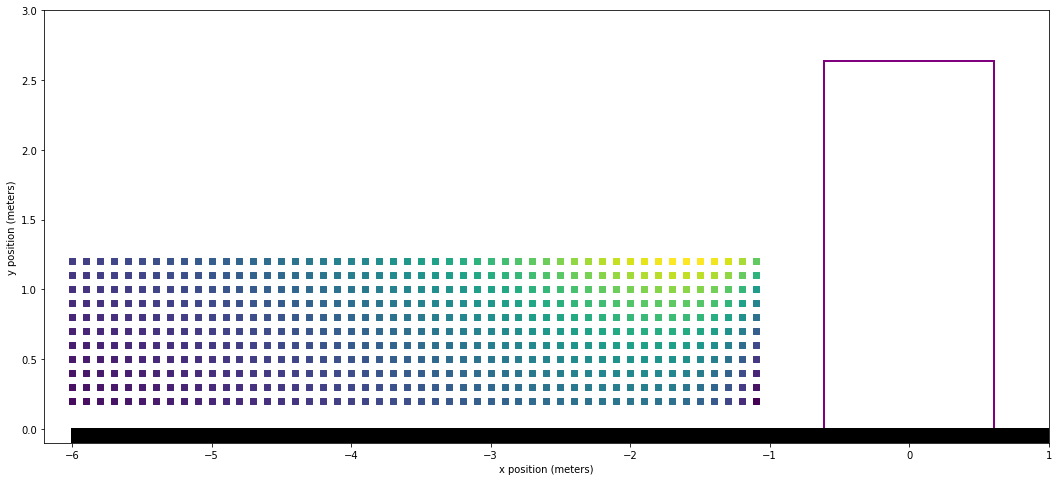

In [97]:
import matplotlib.patches as mpatches


plt.figure(figsize = (8, 8))

x_range = np.arange(-6, -1, 0.1)
y_range = np.arange(0.2, 1.25, 0.1)

area_grid = np.zeros((x_range.size, y_range.size))

for xi in range(x_range.size):
    for yi in range(y_range.size):
        area = get_ang_speed_space(x_range[xi], y_range[yi], doShow=False)
        area_grid[xi][yi] = area * arctan(rim_width / abs(x_range[xi]))
    # print(x_range[xi])

X, Y = np.meshgrid(x_range, y_range)

plt.figure(figsize = (18, 18))
plt.scatter(X, Y, c=area_grid.T, marker='s')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x position (meters)")
plt.ylabel("y position (meters)")
plt.xlim([-6.2, 1])
plt.ylim([-0.1, 3])

left, bottom, width, height = (-rim_width/2, 0, rim_width, rim_height)
rect=mpatches.Rectangle((left,bottom), width, height, fill=False, color="purple", linewidth=2)
plt.gca().add_patch(rect)
plt.gca().add_patch(mpatches.Rectangle((-6, -0.5), 7, 0.5, fill=True, color="black", linewidth=2))
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


